# 信用风险评分项目

使用的数据集为信用分线评分项目。

In [1]:
# 必备的库
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("CreditScoring.csv")  # 导入对应的数据集

In [3]:
# 查看一下数据
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


可以发现所有的列都是大写的，虽然都是统一格式，但是这里将其改写为小写：

In [4]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


这些列是关于个人贷款申请的一些特征和相关信息。根据列名，可以推断出每一列代表的含义如下：

- `status`: 贷款申请者的状态或身份，可能是某种分类，比如1代表"在职"，2代表"自由职业者"等。
- `seniority`: 贷款申请者的工作资历或工作年限。
- `home`: 贷款申请者的住房情况，可能是一个分类变量，比如1代表"有房贷"，2代表"无房贷"等。
- `time`: 贷款期限，通常以月为单位。
- `age`: 贷款申请者的年龄。
- `marital`: 贷款申请者的婚姻状况，可能是一个分类变量，比如1代表"已婚"，2代表"单身"等。
- `records`: 贷款申请者的信用记录情况，可能是一个分类变量，比如1代表"良好"，2代表"不良"等。
- `job`: 贷款申请者的职业类型。
- `expenses`: 贷款申请者的生活开销。
- `income`: 贷款申请者的收入。
- `assets`: 贷款申请者的资产。
- `debt`: 贷款申请者的债务。
- `amount`: 贷款申请的金额。
- `price`: 申请贷款的商品价格（可能是房屋价格或其他商品的价格）。

这些信息通常用于评估个人的信用风险以及决定是否批准贷款申请。

In [5]:
df.dtypes

status       int64
seniority    int64
home         int64
time         int64
age          int64
marital      int64
records      int64
job          int64
expenses     int64
income       int64
assets       int64
debt         int64
amount       int64
price        int64
dtype: object

从结果来看，这些数据都是int类型的数值数据，然而如果与事实相结合，可以发现包括status，home等变量，都应该是分类变量。

In [6]:
# 这里开始进行转换
status_values = {
    1: 'ok',  # 1表示没有问题
    2: 'default',  # 2表示违约
    0: 'unk'  # 0表示unknown，也就是值缺失
}

In [7]:
# 然后开始进行映射
df.status = df.status.map(status_values)

In [8]:
# 对其他的变量也执行相同的操作
# home变量
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
df.home = df.home.map(home_values)

# 婚恋变量
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
df.marital = df.marital.map(marital_values)

# 过往记录
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
df.records = df.records.map(records_values)

# 工作情况
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}
df.job = df.job.map(job_values)

In [9]:
# 然后再查看一下
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


可以通过pandas提供的内置的函数直接得到描述性统计的结果：

In [10]:
df.describe().round()  # 描述性统计

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


这里可以发现存在着 99999999.0 这样的数据，这些数据是这个数据集中关于缺失值的编码的情况。

In [11]:
# 缺失值替换
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999, value = np.nan)  # to_replace为需要被替换的值，value为用来进行替换的值

In [12]:
df.describe().round()  # 查看一下替换之后的结果

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


查看一下数据集的status，也就是目标变量：

In [13]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

可以发现只存在着一个unk的情况，可以选择删除：

In [14]:
df[df.status == 'unk']

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
3309,unk,10,private,60,25,single,no,fixed,35,148.0,3000.0,0.0,1500,1888


In [15]:
df = df[df.status != 'unk']  # 这里是创建了一个新的DataFrame，但是不包含unk的status数据行

接着开始使用Scikit-learn的train_test_split函数来对数据集进行分割：

In [16]:
from sklearn.model_selection import train_test_split
 
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

df_train_full包含的是整个数据集的80%，80%的25%就是整个数据集的20%。

In [17]:
len(df_train), len(df_val), len(df_test)

(2672, 891, 891)

In [18]:
len(df_val) / len(df)

0.20004490345756623

可以发现长度与我们所需要的相符合。

接着是将目标变量y提取出来：

In [19]:
y_train = (df_train.status == 'default').values
y_val = (df_val.status == 'default').values

然后是从原先的数据集中删除：

In [20]:
del df_train['status']
del df_val['status']

接着是关于缺失值的处理，这里还是采用将其替换为0的做法：

In [21]:
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)

为了使用分类变量，还需要进行独热编码：

In [22]:
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

In [23]:
# 查看一个具体的例子
dict_train[0]

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

这个字典列表现在可以用作DictVectorizer的输入：

In [24]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

# 决策树

决策树是一种基于树结构的机器学习模型，用于解决分类和回归问题。它通过一系列的决策节点和叶子节点来表示数据的分类规则或者数值预测规则。

在决策树中，每个内部节点表示一个特征/属性的判断条件，每个分支代表了该属性的一个取值，而每个叶子节点代表了一个类别标签（用于分类问题）或者一个数值（用于回归问题）。

决策树的构建过程通常包括以下步骤：

1. **选择划分属性：** 从所有属性中选择一个最优的划分属性，以将数据集划分为不同的子集。通常使用一些指标（比如信息增益、基尼指数等）来评估每个属性的划分能力。
   
2. **划分数据集：** 根据选择的划分属性将数据集划分为不同的子集。每个子集对应于划分属性的不同取值。
   
3. **递归构建子树：** 对每个子集递归地重复上述过程，直到满足某种停止条件（比如达到最大深度、节点样本数小于某个阈值等）。
   
4. **生成决策树：** 重复以上步骤直到构建完整的决策树。

决策树模型具有直观、易解释的特点，能够处理混合型数据、不需要对数据进行过多的预处理，而且对异常值不敏感。它们通常用于解决分类和回归问题，并且可以用于特征选择、数据探索和决策推理等任务。

这是一个示例：

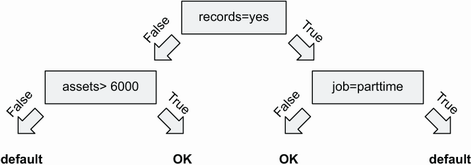

In [25]:
# 这是上面的例子的代码
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

因为需要使用决策树，所以需要从tree包中导入：

In [26]:
from sklearn.tree import DecisionTreeClassifier  # 导入对饮的包

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

接着对结果进行评估，使用AUC作为指标：

In [27]:
from sklearn.metrics import roc_auc_score

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

结果显示的是，模型在训练集上实现了100%完美的预测。

但是我们需要注意的是：在训练集上的100%完美预测既有可能是因为模型的性能特别的好，也有可能是因为模型在训练集上出现了过拟合的情况。

In [28]:
# 使用验证集来进行测试
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6562537841176043

可以发现，在验证集上，只有65的准确率。

可以发现，原先的模型是一个典型的过拟合的情况，这是决策树本身的原理决定的：

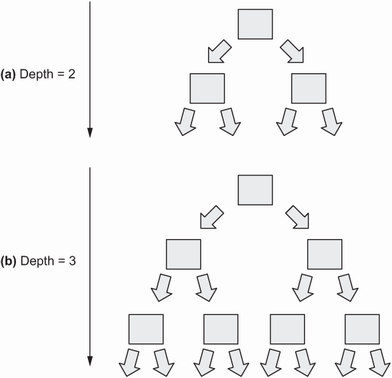

决策树可以不断地增加节点和深度，从而为每一个样本都给出一个最终节点，从而完美完美的分类。

为了防止过拟合，一个措施是现实树的深度。

In [29]:
# 默认情况之下，树的深度参数为None
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

可以使用tree包中的export_text函数来进行可视化：

In [30]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- class: False
|   |--- job=partime >  0.50
|   |   |--- class: True
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- class: True
|   |--- seniority >  6.50
|   |   |--- class: False



这个结果是一个简单的决策树模型的输出，描述了一棵决策树的结构和决策规则。让我来解释一下：

- 树的每一层都包含一个条件判断，称为节点。
- 从根节点开始，根据条件判断的结果，选择不同的分支，直到到达叶子节点，叶子节点给出最终的分类结果。

这个决策树包含了两个特征（`records` 和 `seniority`）和一个目标变量（`class`）。

- 如果 `records` 的取值小于等于 0.50，则进入左子树，否则进入右子树。
  - 如果 `records` 的取值小于等于 0.50，并且 `job` 的取值小于等于 0.50，则预测结果为 `False`。
  - 如果 `records` 的取值小于等于 0.50，并且 `job` 的取值大于 0.50，则预测结果为 `True`。
- 如果 `records` 的取值大于 0.50，则进入右子树。
  - 如果 `seniority` 的取值小于等于 6.50，则预测结果为 `True`。
  - 如果 `seniority` 的取值大于 6.50，则预测结果为 `False`。

这个决策树描述了如何根据输入特征 `records` 和 `seniority` 来预测目标变量 `class`。通过观察不同特征的取值，树可以按照给定的规则对数据进行分类。

可也可以使用其他的可视化方法：

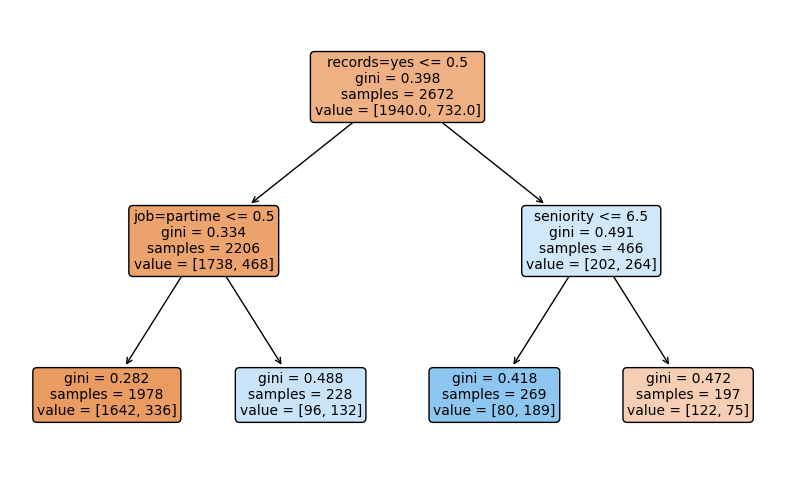

In [32]:
from sklearn import tree

plt.figure(figsize=(10, 6))
tree.plot_tree(dt, feature_names=dv.feature_names_, filled=True, rounded=True, fontsize=10)
plt.show()

接着看一下这个决策树的性能如何：

In [33]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("validation auc", auc)

train auc 0.7054989859726213
validation auc 0.6685264343319367


从结果来看，可以发现决策树在训练集上的准确度下降了，但是在验证集上的准确性上升了。

但是这个树太简单了，所以需要尝试不同的参数并且查看哪些参数的效果最佳，能够带来最好的AUC。

In [34]:
# 尝试不同的参数，并且计算对应的auc分数
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.766
   6 -> 0.750
  10 -> 0.678
  15 -> 0.673
  20 -> 0.635
None -> 0.658


可以发现当max_depth的值为5的情况之下是最好的。

但是我们需要采用4，5，6三个max_depth，然后调试一下min_samples_leaf的参数：

In [37]:
for m in [4, 5, 6]:
    
    print('depth: %s' % m)

    for s in [1, 5, 10, 15, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth = m, min_samples_leaf = s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%4s -> %.3f' % (s, auc))

depth: 4
   1 -> 0.761
   5 -> 0.761
  10 -> 0.761
  15 -> 0.764
  20 -> 0.761
  50 -> 0.753
 100 -> 0.756
 200 -> 0.747
depth: 5
   1 -> 0.766
   5 -> 0.768
  10 -> 0.762
  15 -> 0.772
  20 -> 0.774
  50 -> 0.768
 100 -> 0.763
 200 -> 0.759
depth: 6
   1 -> 0.745
   5 -> 0.760
  10 -> 0.778
  15 -> 0.785
  20 -> 0.774
  50 -> 0.772
 100 -> 0.776
 200 -> 0.768


结果最好的是depth=6和min_samples_leaf=15。

In [39]:
# 使用这个最佳的参数来训练最后的树
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

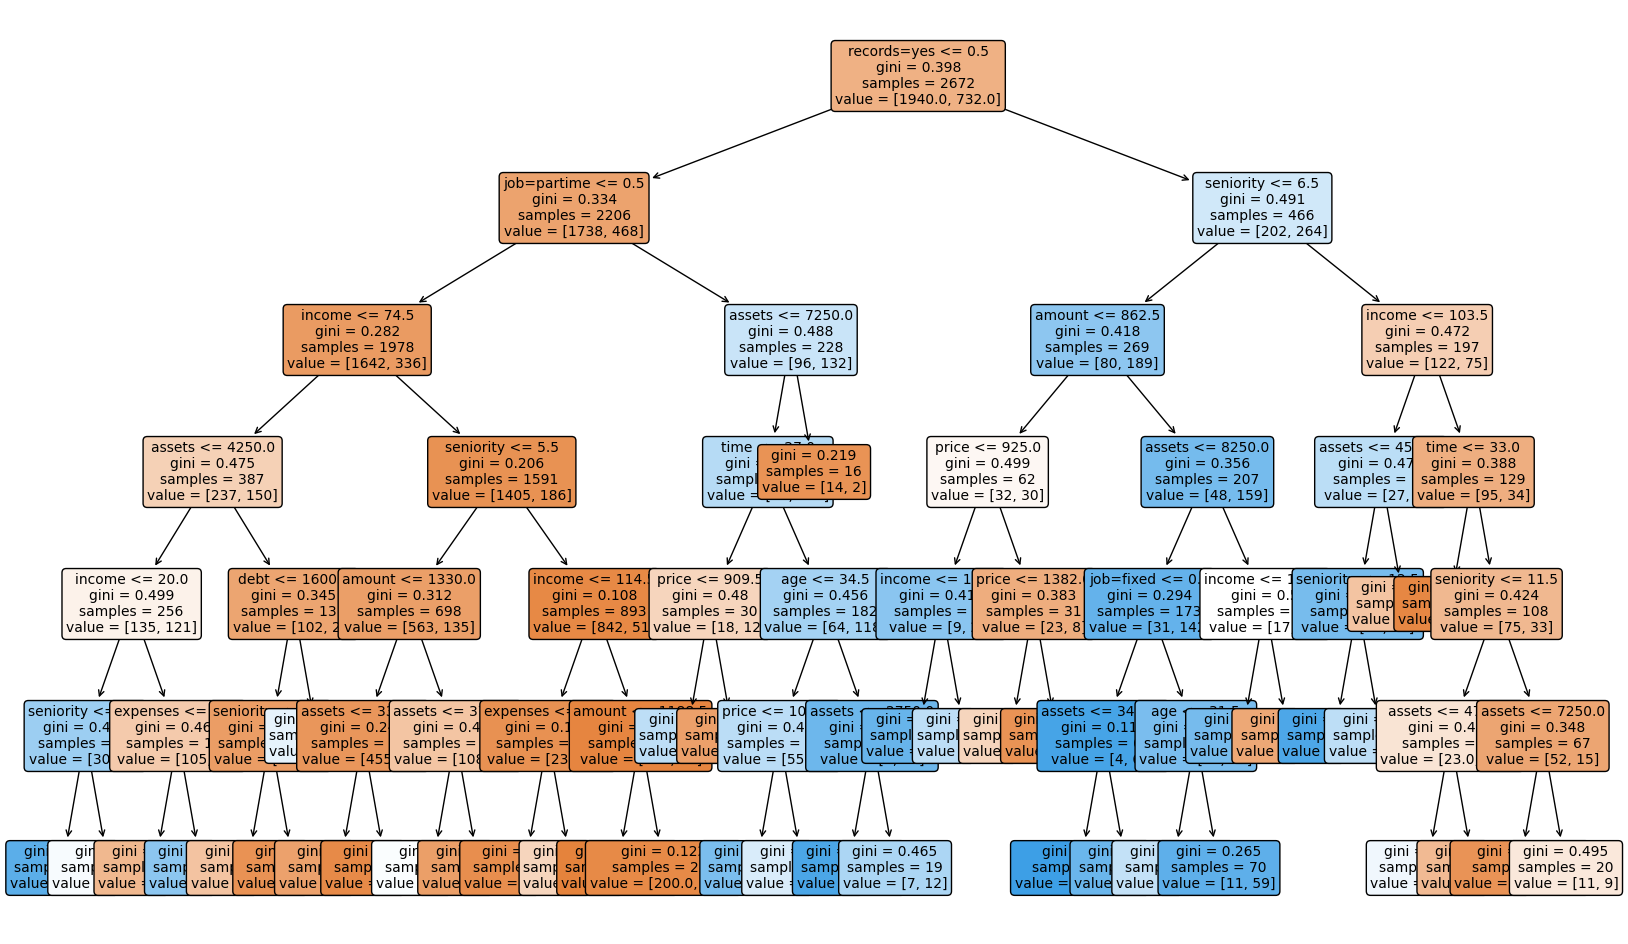

In [41]:
plt.figure(figsize=(20, 12))
tree.plot_tree(dt, feature_names=dv.feature_names_, filled=True, rounded=True, fontsize=10)
plt.show()

可视化不是非常的美观，因为存在着一些重叠。

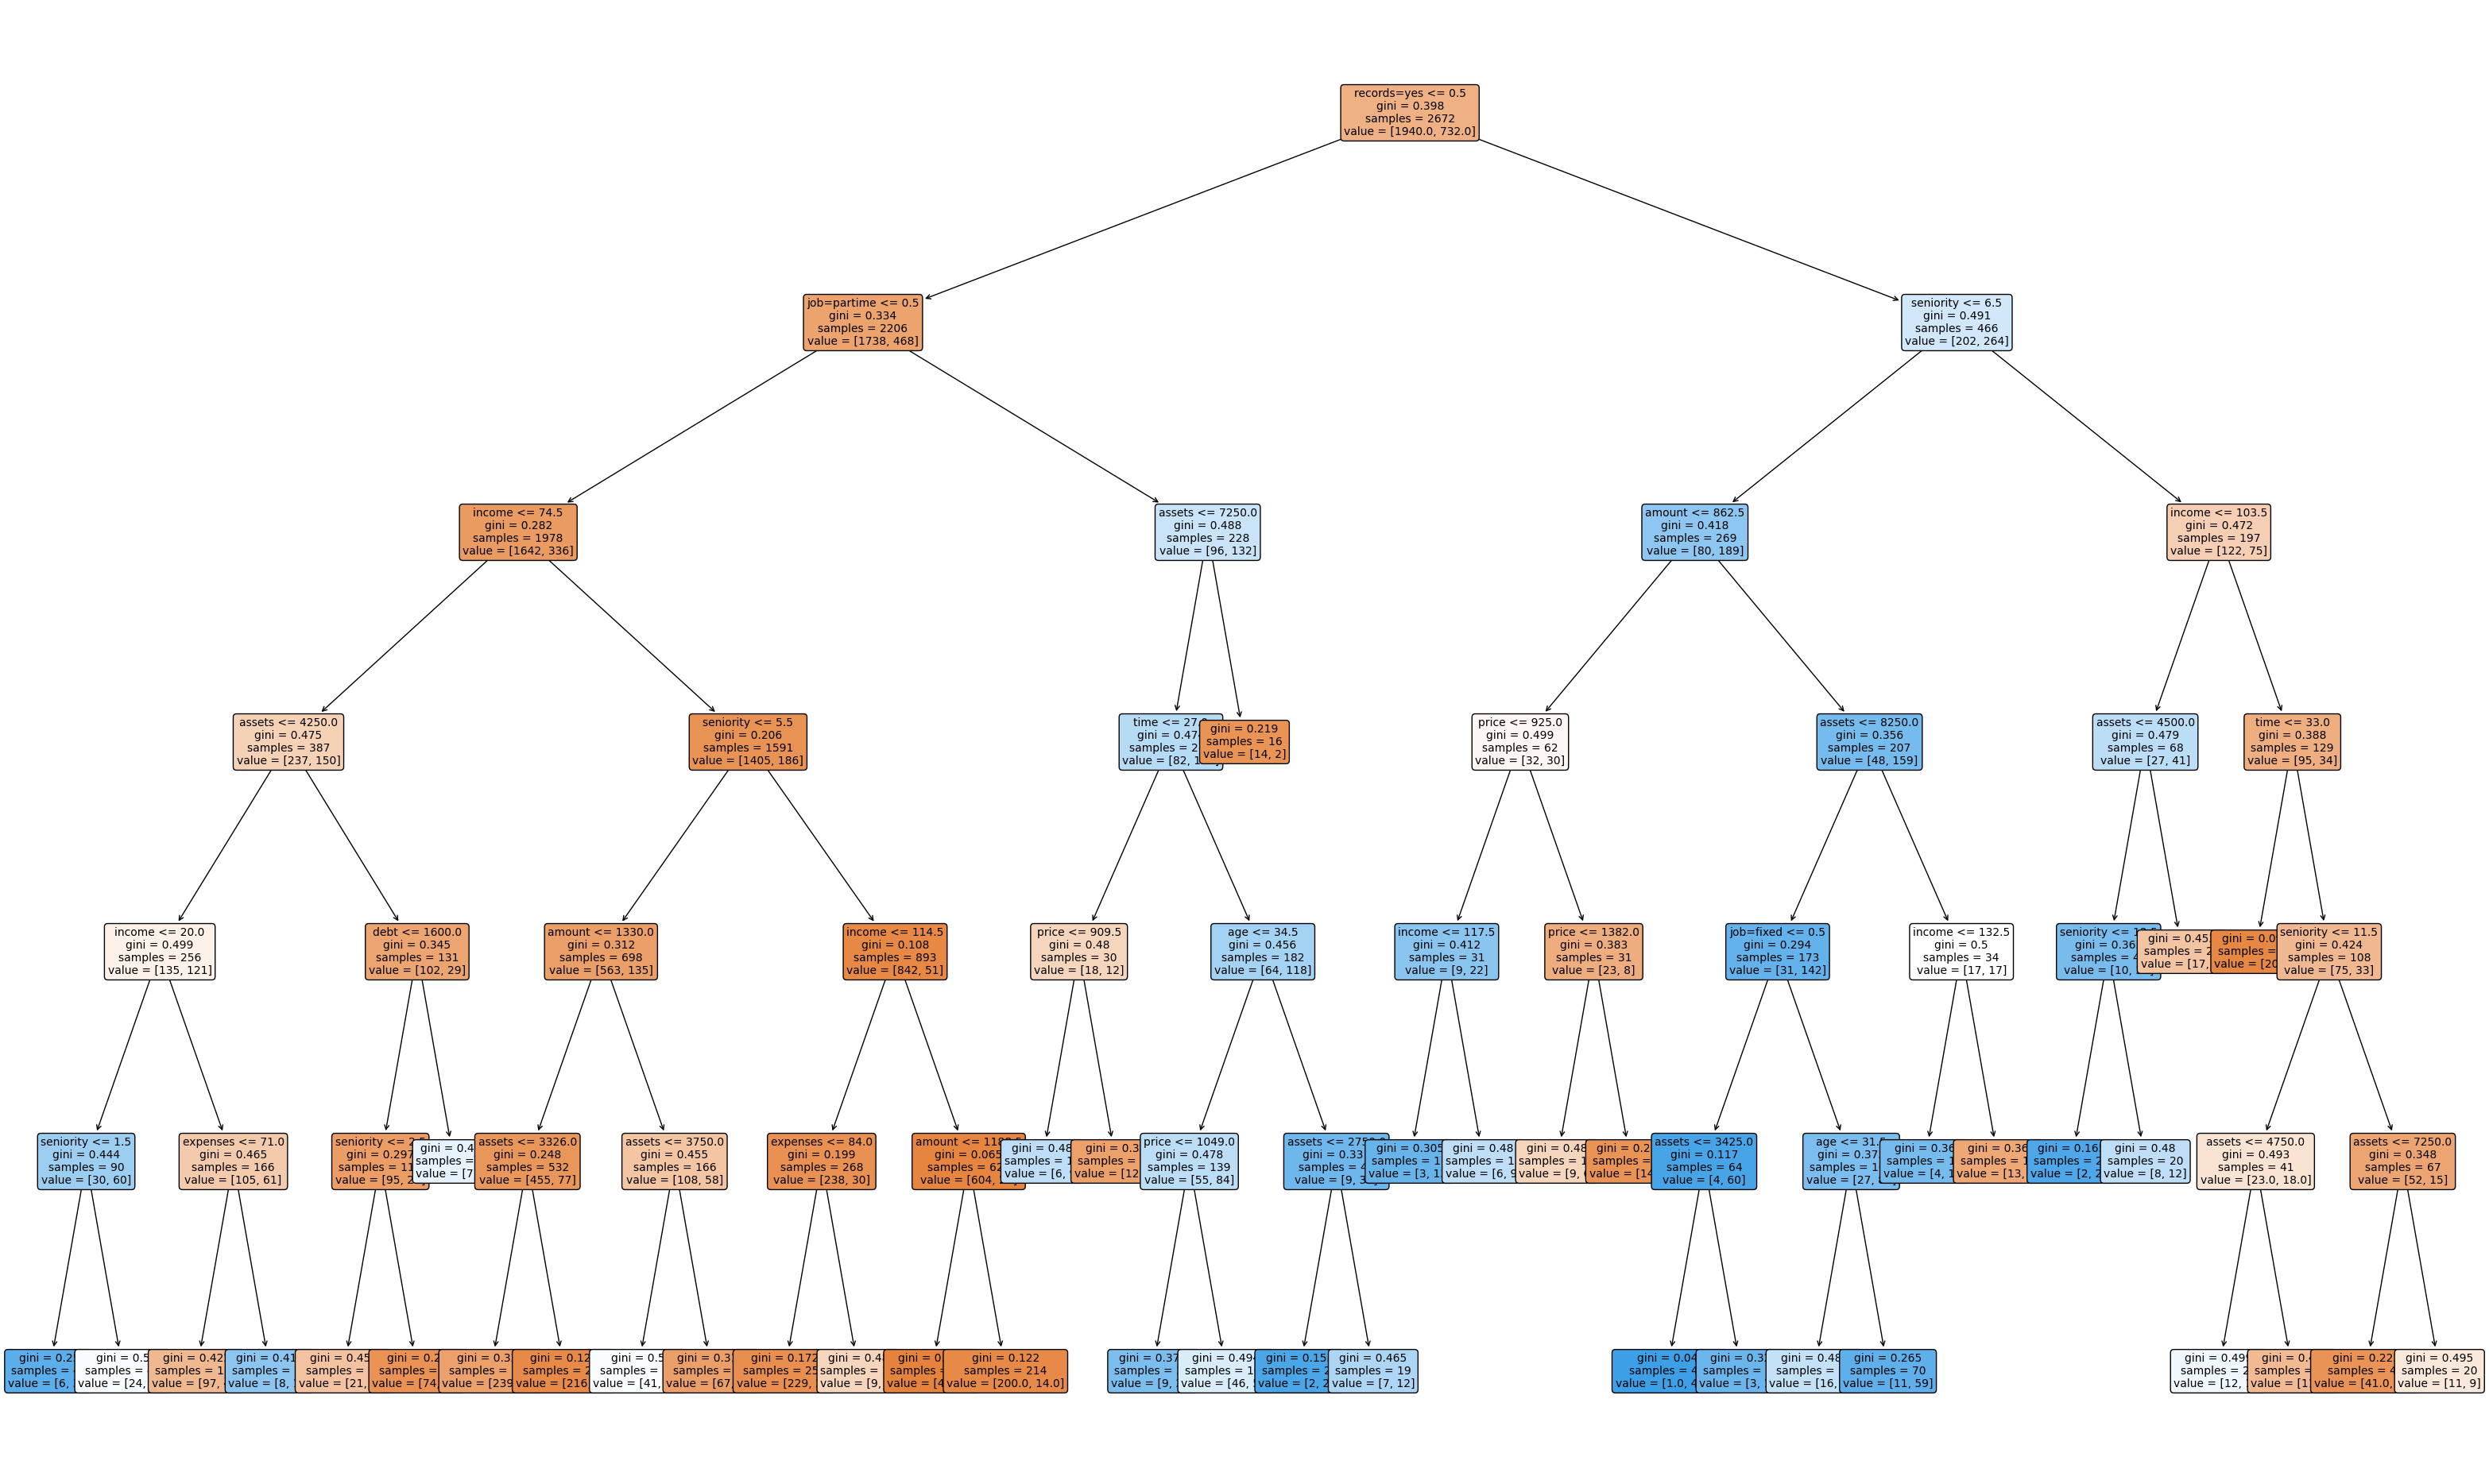

In [42]:
plt.figure(figsize=(40, 24))
tree.plot_tree(dt, feature_names=dv.feature_names_, filled=True, rounded=True, fontsize=10)
plt.show()

这样区分度就大了很多，但是文字太小了。

In [43]:
# 使用文字
tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- expenses <= 71.00
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- expenses >  71.00
|   |   |   |   |   |   |--- class: True
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1600.00
|   |   |   |   |   |--- seniority <= 2.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- seniority >  2.50
|   |   |   |   |   |   |--- class: False
|   |   |   |   |--- debt >  1600.00
|   |   |   |   |   |--- class: True
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- assets <= 3326.00
|   |   |

# 随机森林